In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = load_breast_cancer()
x = data.data
y = data.target

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver ='auto')
pcaCancer = pca.fit_transform(x)

<IPython.core.display.Javascript object>


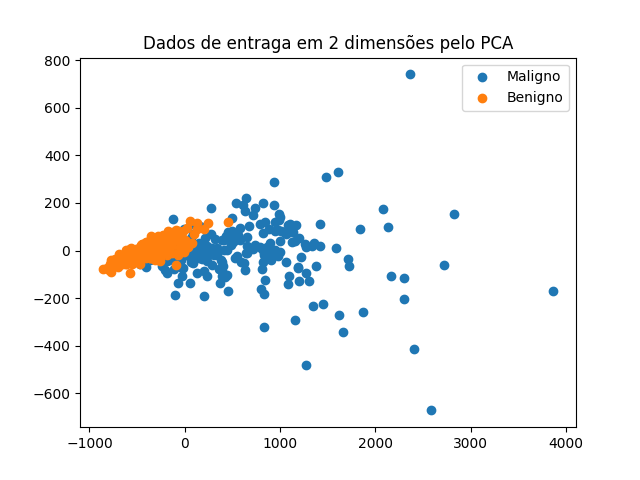

In [50]:
%matplotlib notebook
plt.scatter(pcaCancer[y==0, 0],pcaCancer[y==0, 1], label = 'Maligno')
plt.scatter(pcaCancer[y==1, 0],pcaCancer[y==1, 1], label = 'Benigno')
plt.legend()
plt.title('Dados de entraga em 2 dimensões pelo PCA')
plt.show()

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

n_comp = list(range(1,31))
acc = []

for n in n_comp:
    acc_each = []
    for i in range(30):
        pca = PCA(n_components=n, svd_solver ='auto')
        pcaCancer = pca.fit_transform(x)
        x_train, x_test, y_train, y_test = tts(pcaCancer, y, test_size=0.1)
        clf = SVC(C=100, kernel='rbf')
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc_each.append(accuracy_score(y_test, y_pred))
    acc.append(np.mean(acc_each))

<IPython.core.display.Javascript object>


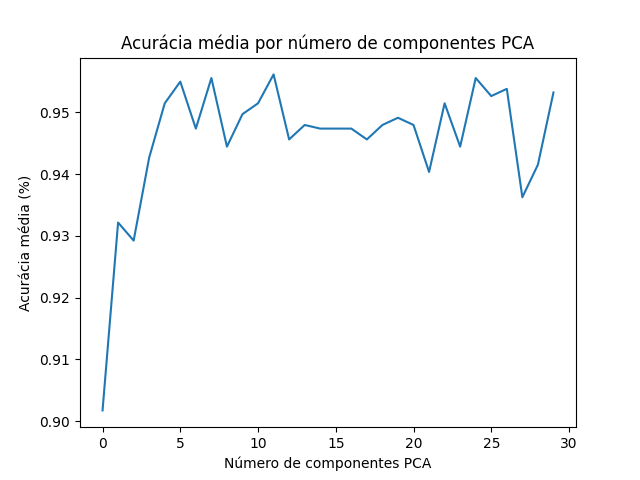

11

In [87]:
%matplotlib notebook

plt.plot(acc)
plt.show()
plt.title('Acurácia média por número de componentes PCA')
plt.xlabel('Número de componentes PCA')
plt.ylabel('Acurácia média (%)')
acc.index(np.max(acc))

In [82]:
%matplotlib notebook
from copy import copy
from math import floor
pca = PCA(n_components=12, svd_solver ='auto')
pcaCancer = pca.fit_transform(x)
folds = 10
data = np.concatenate([pcaCancer, y.reshape(-1, 1)], 1)
np.random.shuffle(data)
k_arrays = np.array_split(data, folds)
accuracy = []
for i in range(len(k_arrays)):
    train_arrays = copy(k_arrays)
    test_array = train_arrays.pop(i)
    train_arrays = np.concatenate(train_arrays)
    clf = SVC(C=100, kernel='rbf')
    clf.fit(train_arrays[:, :-1], train_arrays[:, -1])
    y_pred = clf.predict(test_array[:, :-1])
    accuracy.append(accuracy_score(test_array[:,-1], y_pred))

In [86]:
print(f'Acurácia média: {np.mean(accuracy)}')
print(f'Acurácia por fold: {accuracy}')

Acurácia média: 0.9437030075187971
Acurácia por fold: [0.9122807017543859, 0.9824561403508771, 0.9824561403508771, 0.9298245614035088, 0.9649122807017544, 0.9298245614035088, 0.9298245614035088, 0.9649122807017544, 0.9298245614035088, 0.9107142857142857]
